In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the data 
data_path = r'C:\Users\Administrator\Documents\Proyectos\TECH-CAMP\Proyecto-1\data\data.xlsx'
df = pd.read_excel(data_path)
df

,Proyecto,Vende,Dirección,Tipo,Zona,Alc.,Baños Completos,Baños sin Terminar,Area,Disponibilidad,Precio,Precio M2
0,Hacienda Club Conj. Cerr,Moresa Const.,"Vía Bocono, frente futuro Club Tennis",Lote,Villa del Rosario,0,0,0,731.00,13,360000000,4.924761e+05
1,Conj. Malibu Country Club,U.T. Malibu,Via Bocono km 3 + 234 mt,Lote,Villa del Rosario,0,0,0,717.00,1,300000000,4.184100e+05
2,Cond. Sierra Nevada,Const. Olinto Prada/Const. Morelly,Km 2 Via Villa del Rosario Aut. Internacional,Casa,Los Patios,4,3,0,163.00,16,390000000,2.392638e+06
3,Cond. Sierra Nevada,Const. Olinto Prada/Const. Morelly,Km 2 Via Villa del Rosario Aut. Internacional,Casa,Los Patios,4,5,0,179.00,31,680000000,3.798883e+06
4,Dubai Club House,Urb. Y Prom. Dubai,"Av. 10/ los patios # 90-46,junto Univ. Francis...",Casa,Los Patios,3,3,0,115.00,1,331500000,2.882609e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
115,Torres de Magenta,Colproyectos SAS,Junto conjunto Brisas de Arkamar,Apto.,Este,2,1,0,37.70,34,123000000,3.262599e+06
116,Brisas del Viñedo,Const. Viñedos Arijau,Metros adelante frente al conjunto Nassau,Casa,Villa del Rosario,2,1,0,75.60,71,215000000,2.843915e+06
117,Brisas del rio,Const. Viñedos Arijau,Diag. al Mega Colegio La Frontera,Apto.,Villa del Rosario,3,2,0,59.43,63,175000000,2.944641e+06
118,Viale Aptos,Vertices Urbanos,Al lado de Bosque de la Variannte,Apto.,Los Patios,3,2,0,50.45,44,227590000,4.511199e+06


In [3]:
# Step 1: Basic Data Inspection
# Initialize the Data Inspector with a Strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proyecto            120 non-null    object 
 1   Vende               120 non-null    object 
 2   Dirección           120 non-null    object 
 3   Tipo                120 non-null    object 
 4   Zona                120 non-null    object 
 5   Alc.                120 non-null    int64  
 6   Baños Completos     120 non-null    int64  
 7   Baños sin Terminar  120 non-null    int64  
 8   Area                120 non-null    float64
 9   Disponibilidad      120 non-null    int64  
 10  Precio              120 non-null    int64  
 11  Precio M2           120 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 11.4+ KB
None


In [4]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
             Alc.  Baños Completos  Baños sin Terminar        Area  \
count  120.000000       120.000000          120.000000  120.000000   
mean     2.308333         1.925000            0.091667  110.667333   
std      1.051576         1.131389            0.289765  122.348684   
min      0.000000         0.000000            0.000000   36.400000   
25%      2.000000         1.000000            0.000000   52.940000   
50%      3.000000         2.000000            0.000000   66.500000   
75%      3.000000         2.000000            0.000000  118.075000   
max      4.000000         5.000000            1.000000  731.000000   

       Disponibilidad        Precio     Precio M2  
count      120.000000  1.200000e+02  1.200000e+02  
mean        20.608333  3.018187e+08  3.468207e+06  
std         28.295053  2.012405e+08  1.505277e+06  
min          1.000000  5.299000e+07  4.184100e+05  
25%          3.000000  1.649000e+08  2.583370e+06  
50%         10.


Missing Values Count by Column:
Series([], dtype: int64)

Missing Values Heatmap:


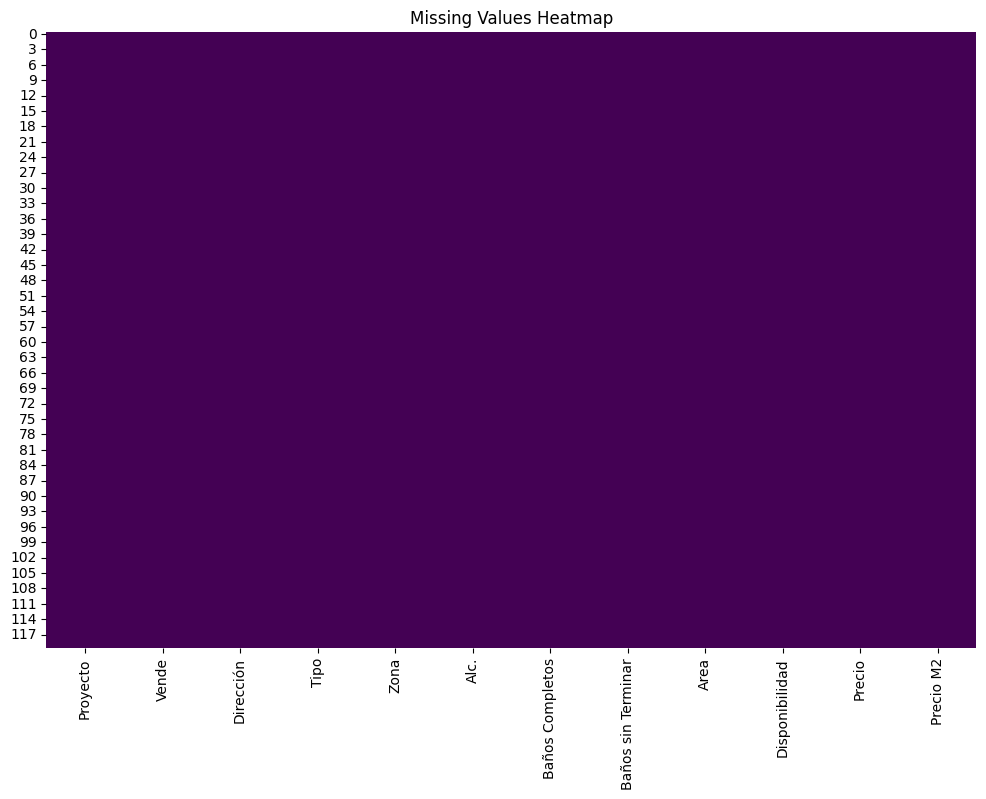

In [5]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

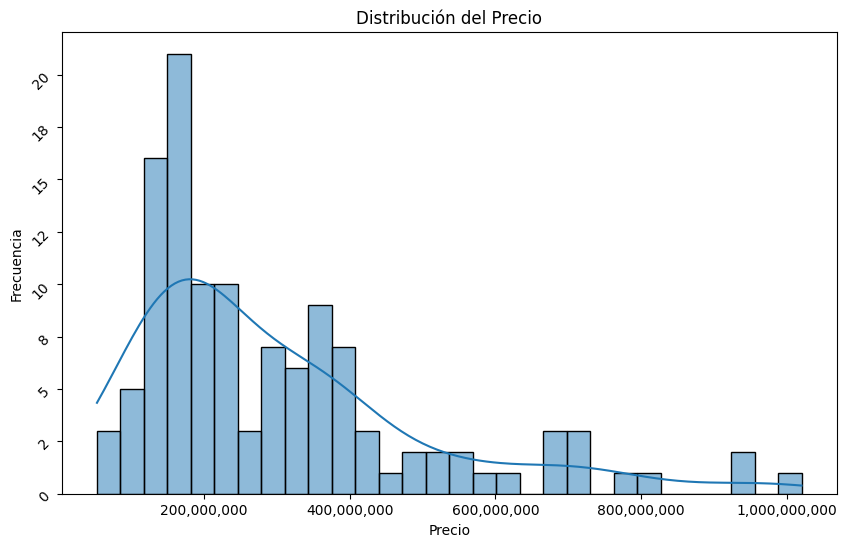

In [6]:
# Step 3: Univariate Analysis
# ------------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Precio')

c:\Users\Administrator\Documents\Proyectos\TECH-CAMP\Proyecto-1\analysis\analyze_src\univariate_analysis.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


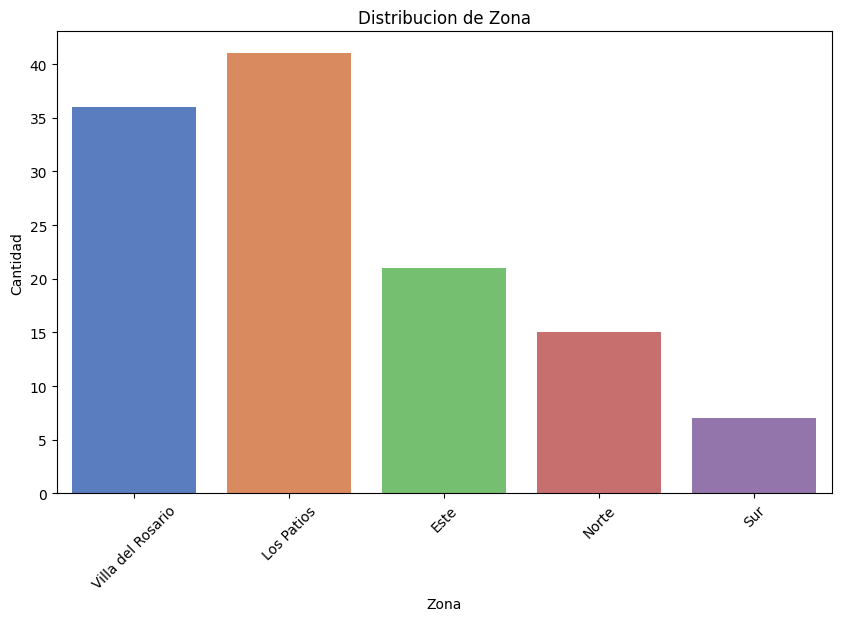

In [7]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Zona')

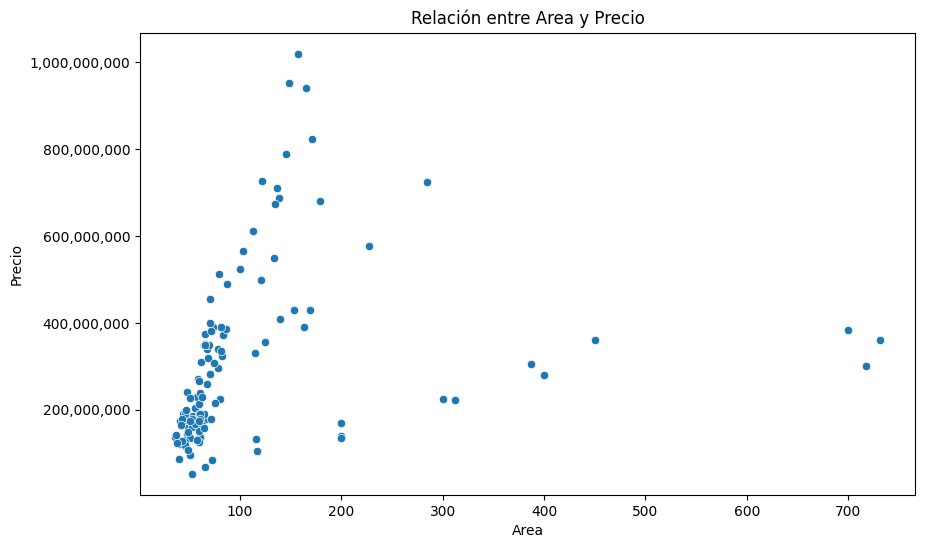

In [8]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Area', 'Precio')

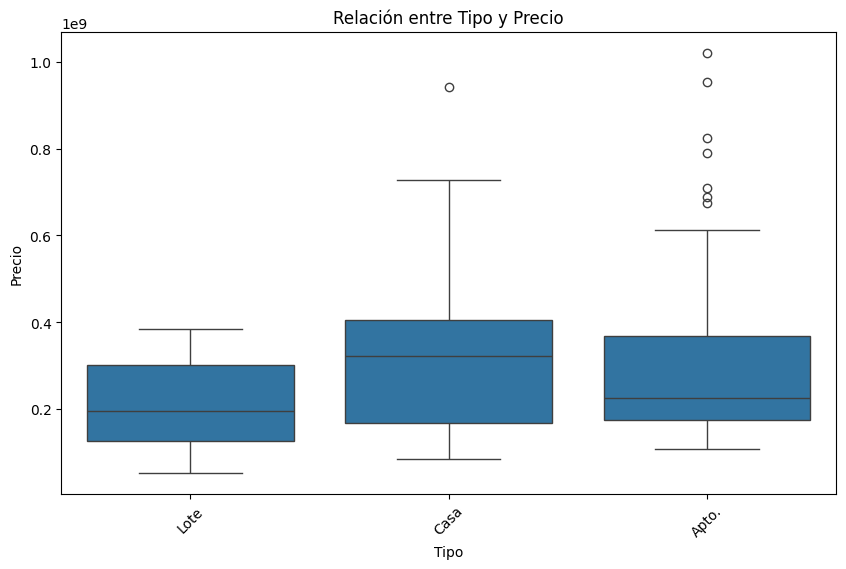

In [9]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Tipo', 'Precio')

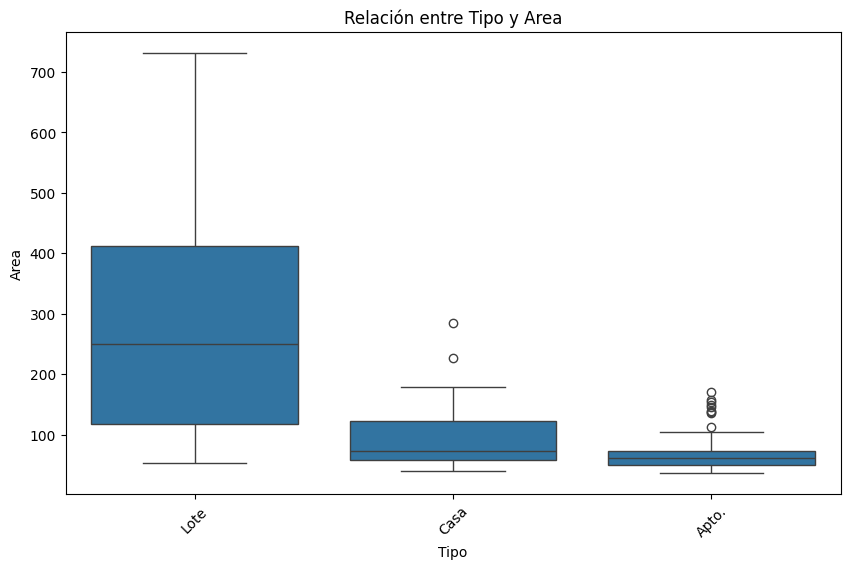

In [10]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Tipo', 'Area')

In [11]:
def remove_outliers(df: pd.DataFrame, column: str):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df, 'Precio')

print(df.shape)
print(df_cleaned.shape)

(120, 12)
(112, 12)


In [12]:
df_cleaned = remove_outliers(df_cleaned, 'Area')
print(f"Dimensiones antes de eliminar outliers: {df.shape}")
print(f"Dimensiones después de eliminar outliers: {df_cleaned.shape}")

Dimensiones antes de eliminar outliers: (120, 12)
Dimensiones después de eliminar outliers: (96, 12)


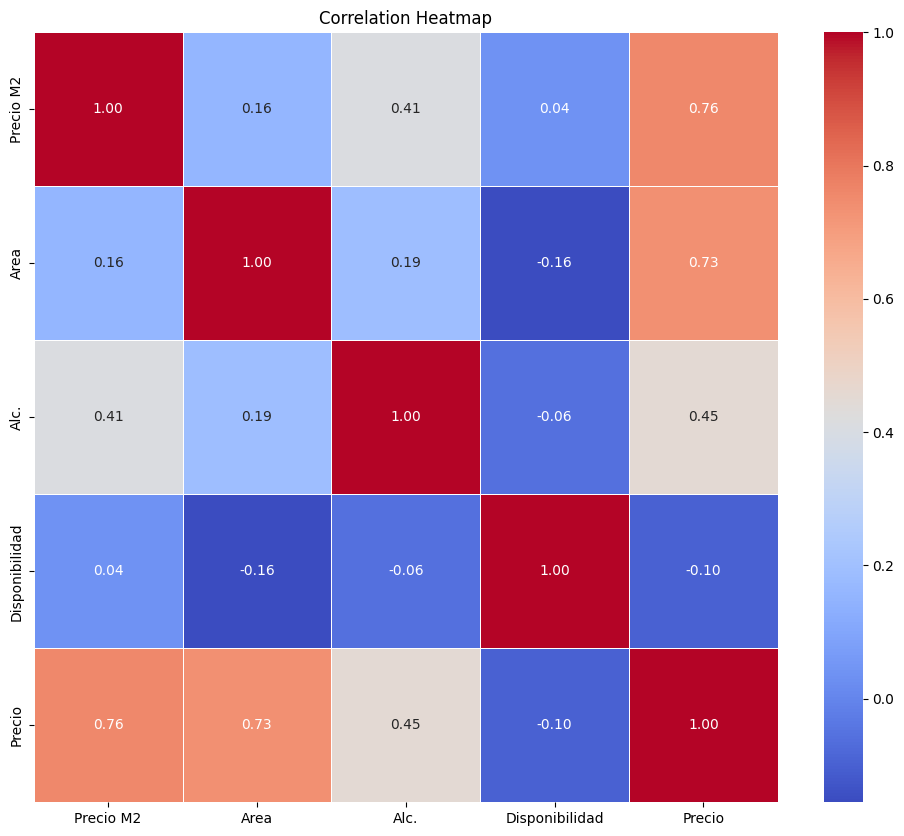

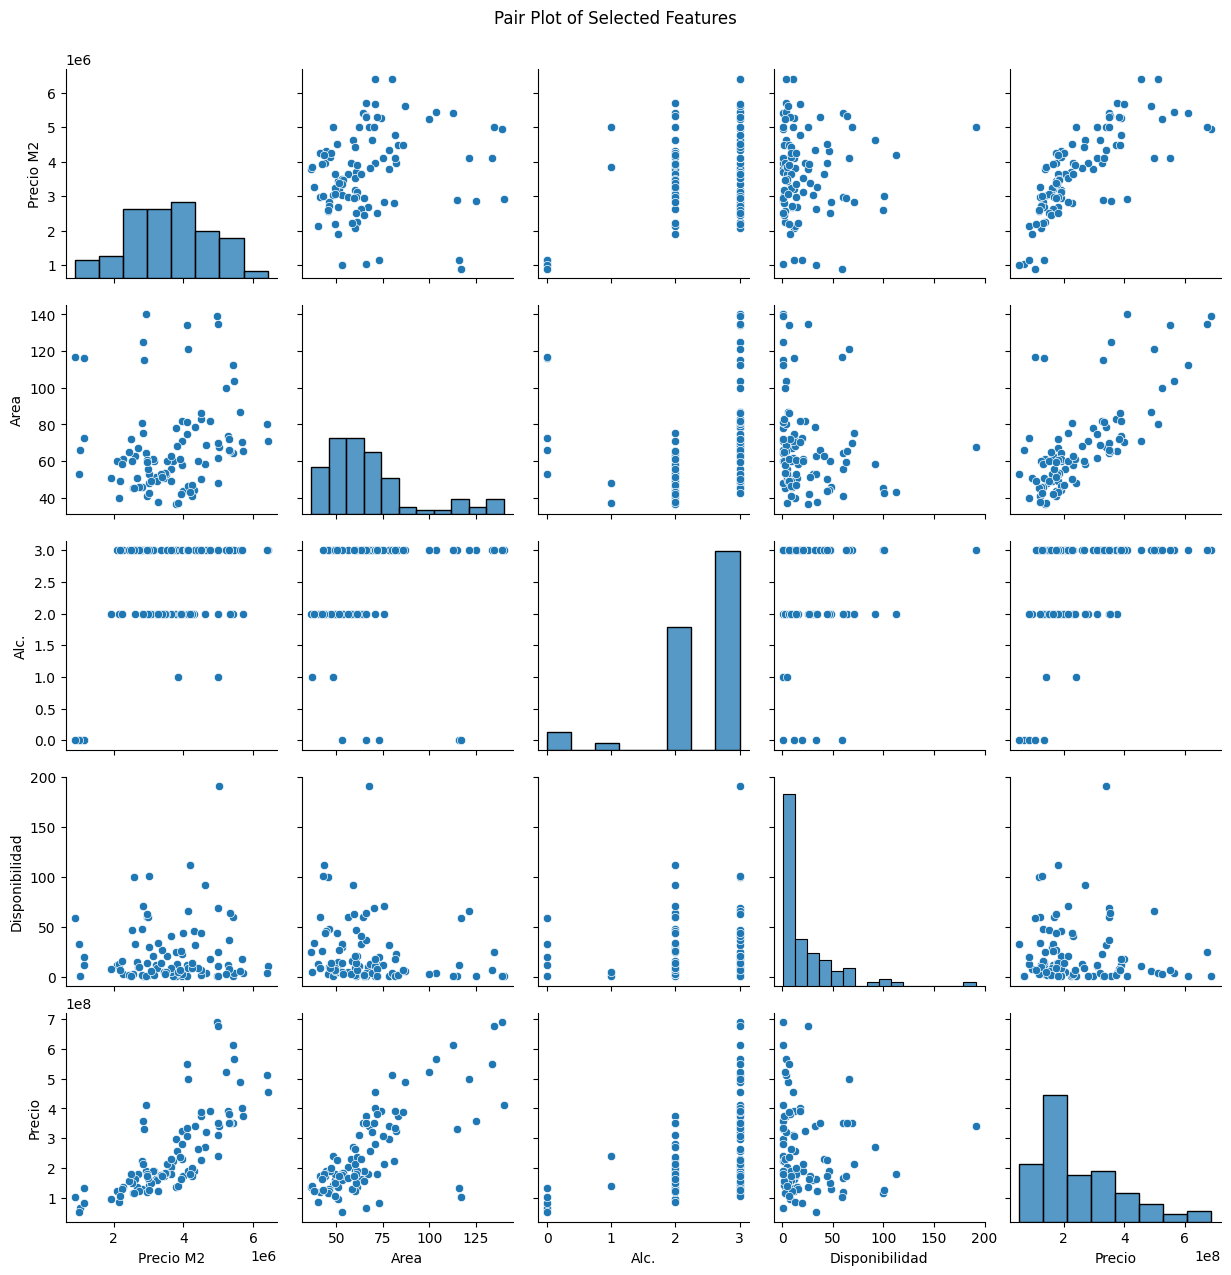

In [13]:
# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df_cleaned[['Precio M2', 'Area', 'Alc.', 'Disponibilidad', 'Precio']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

In [14]:
df_cleaned.rename(columns={'Alc.': 'Habitaciones', 'Baños Completos': 'Baños', 'Baños sin Terminar': 'Baños s-t', 'Dirección': 'Direccion'}, inplace=True)

In [15]:
df_cleaned.columns

Index(['Proyecto', 'Vende', 'Direccion', 'Tipo', 'Zona', 'Habitaciones',
       'Baños', 'Baños s-t', 'Area', 'Disponibilidad', 'Precio', 'Precio M2'],
      dtype='object')

In [16]:
print(df_cleaned['Proyecto'].unique())
print(df_cleaned['Proyecto'].unique().shape)

['Dubai Club House' 'Brisas de Arkamar' 'Asturias Imperial' 'Dehesa Park'
 'Dalí' 'Pinares' 'Reserva del Resúmen' 'Ciudad Viva "Los Nogales"'
 'Mediterrané Club House' 'Alameda del Este "Robles"' 'Zurich' 'Aquamonti'
 'Patios Club' 'Torino' 'Zakura Reserva-Gold' 'Las Margaritas' 'Fortuna 5'
 'Prisma' 'Barú' 'Ciudad Boreal "Canaria"' 'Giotto' 'Montefiori'
 'Molinos Torres' 'Urb. Villa Molinos..' 'Vista Hermosa' 'Luxo II'
 'Pradera del Este' 'Ícaro Parque Resc. "Tucán"' 'Urb. Monte Brisas'
 'Bosques de la Variante..' 'Garden Cond.' 'Zakura Reserva-Silver'
 'Jardin del Este' 'Monterosso Urbanizacion' 'Monterosso Club' 'Guayacan'
 'Foresta Eco Tower' 'Ciudad Viva "Hobby"' 'Urb. Golondrinas'
 'MonteBianco' 'Ciudad Viva "Trendy"' 'Rincon de Trapiches Casas'
 'Bosques del Este' 'Moretto Club House' 'Kolina 8'
 'Rincon de Trapiches Aptos' 'Monte Veritá' 'Piemontti'
 'Rincon de Trapiches 2' 'Terra Club House' 'Samanes Aptos'
 'Colinas del Mirador' 'Los Angeles' 'Catania Aptos' 'Rio 1505'
 'Anto

In [17]:
print(df_cleaned['Vende'].unique())
print(df_cleaned['Vende'].unique().shape)

['Urb. Y Prom. Dubai' 'Inv. Arkamar' 'Viviendas y Valores' 'Celeus Group'
 'Construdali' 'Sigma' 'Const. Yadel' 'Ovinco Const.' 'Vertices Urbanos'
 'Moresa Const.' 'CHI Ingenieria S.A.S' 'Constructora Puente Cucuta'
 'Const. JR' 'Const. JR/CarvajaryRivera' 'Const. Monape' 'Aycardi Inmb.'
 'Const. El Palustre' 'Hernando Gene Proyectos sas' 'Colproyectos SAS'
 'Atria Grupo Constructor' 'Ecoverde' 'Altavista Plus S.A.S'
 'Constructora Povos' 'Inm. Y Const. Grupo Hogar' 'Monoblock'
 'Const. San Fernando del Rodeo' 'Soproi' 'M y MP Const.'
 'Const. Viñedos Arijau']
(29,)


In [18]:
print(df_cleaned['Direccion'].unique())
print(df_cleaned['Direccion'].unique().shape)

['Av. 10/ los patios # 90-46,junto Univ. Francisco Paula Santander'
 'Via Bocono frente al retorno' 'Cl. 8-Av. del rio'
 'Variante la floresta frente Santibari , 400m de la bomba pinar del Rio'
 'Bellavista sector buganviles'
 'Via  La Floresta frente a Cond. Santibari'
 'via pórtico, despues de Coca-cola' 'Variente la Floresta'
 'Aut. Internacional frente antiguio Mr Charles' 'Via la Gazapa Cl. 6 E'
 'Av. 10E Cl. 7-8' 'Av. 2E # 17-22'
 'Cl. 1A-Cr. 11B, entrando por Bomberos, los Patios'
 'Anillo vial oriental, al lado de Pego Forteza'
 'Aut. San Antonio-Villa del Rosario' 'Anillo Vial Occ. C. Las flores'
 'Anillo vial Oriental. Al lado de la fortuna'
 'Cl. 5b-Cr. 1  detrás de Trs de San Nicolas, Los patios'
 'Anillo Vial Oriental- Cl. 19 ,frente a Cemex'
 'Anillo vial oriental, detrás de CC Jardín Plaza'
 'Anillo Vial Oriental- Cl. 19 , entrada trapiches al lado de trebol'
 'Sector molinos, entrada antes de la Y del Anillo vial via Pto santander'
 'El Zulia-Finca el triunfo, al lado d

In [19]:
print(df_cleaned['Tipo'].unique())
print(df_cleaned['Tipo'].unique().shape)

['Casa' 'Apto.' 'Lote']
(3,)


In [20]:
print(df_cleaned['Zona'].unique())
print(df_cleaned['Zona'].unique().shape)

['Los Patios' 'Este' 'Norte' 'Sur' 'Villa del Rosario']
(5,)


In [21]:
le = LabelEncoder()
df_cleaned['Zona'] = le.fit_transform(df_cleaned['Zona'])
df_cleaned['Tipo'] = le.fit_transform(df_cleaned['Tipo'])

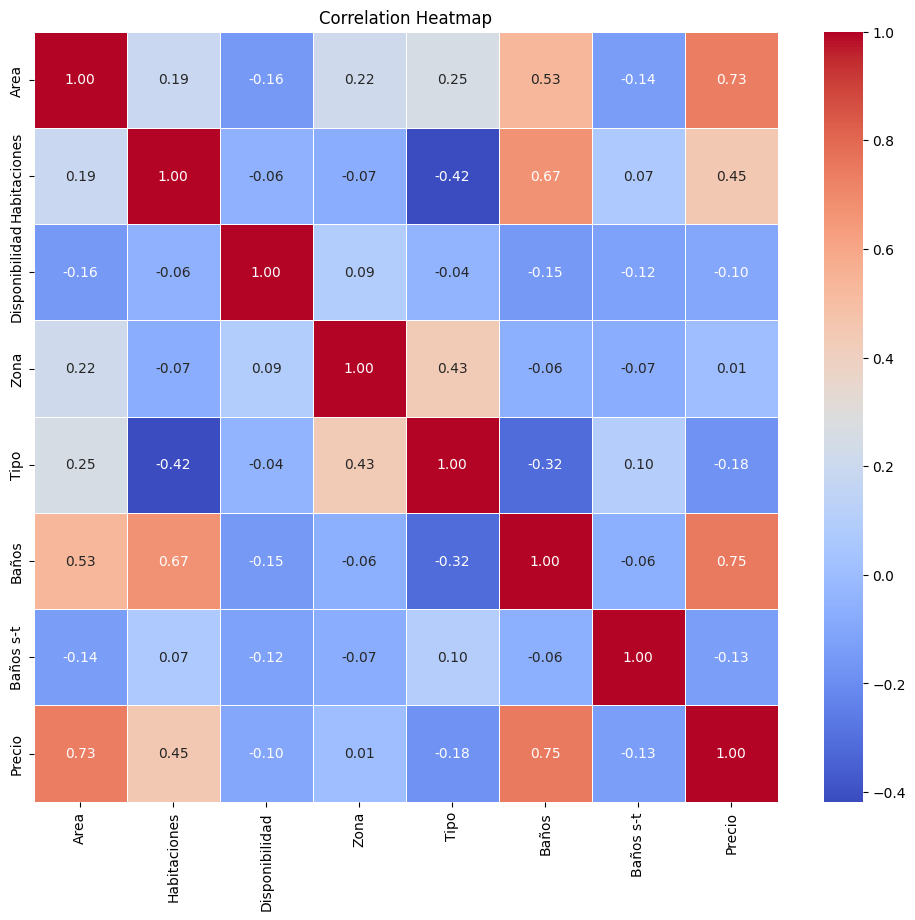

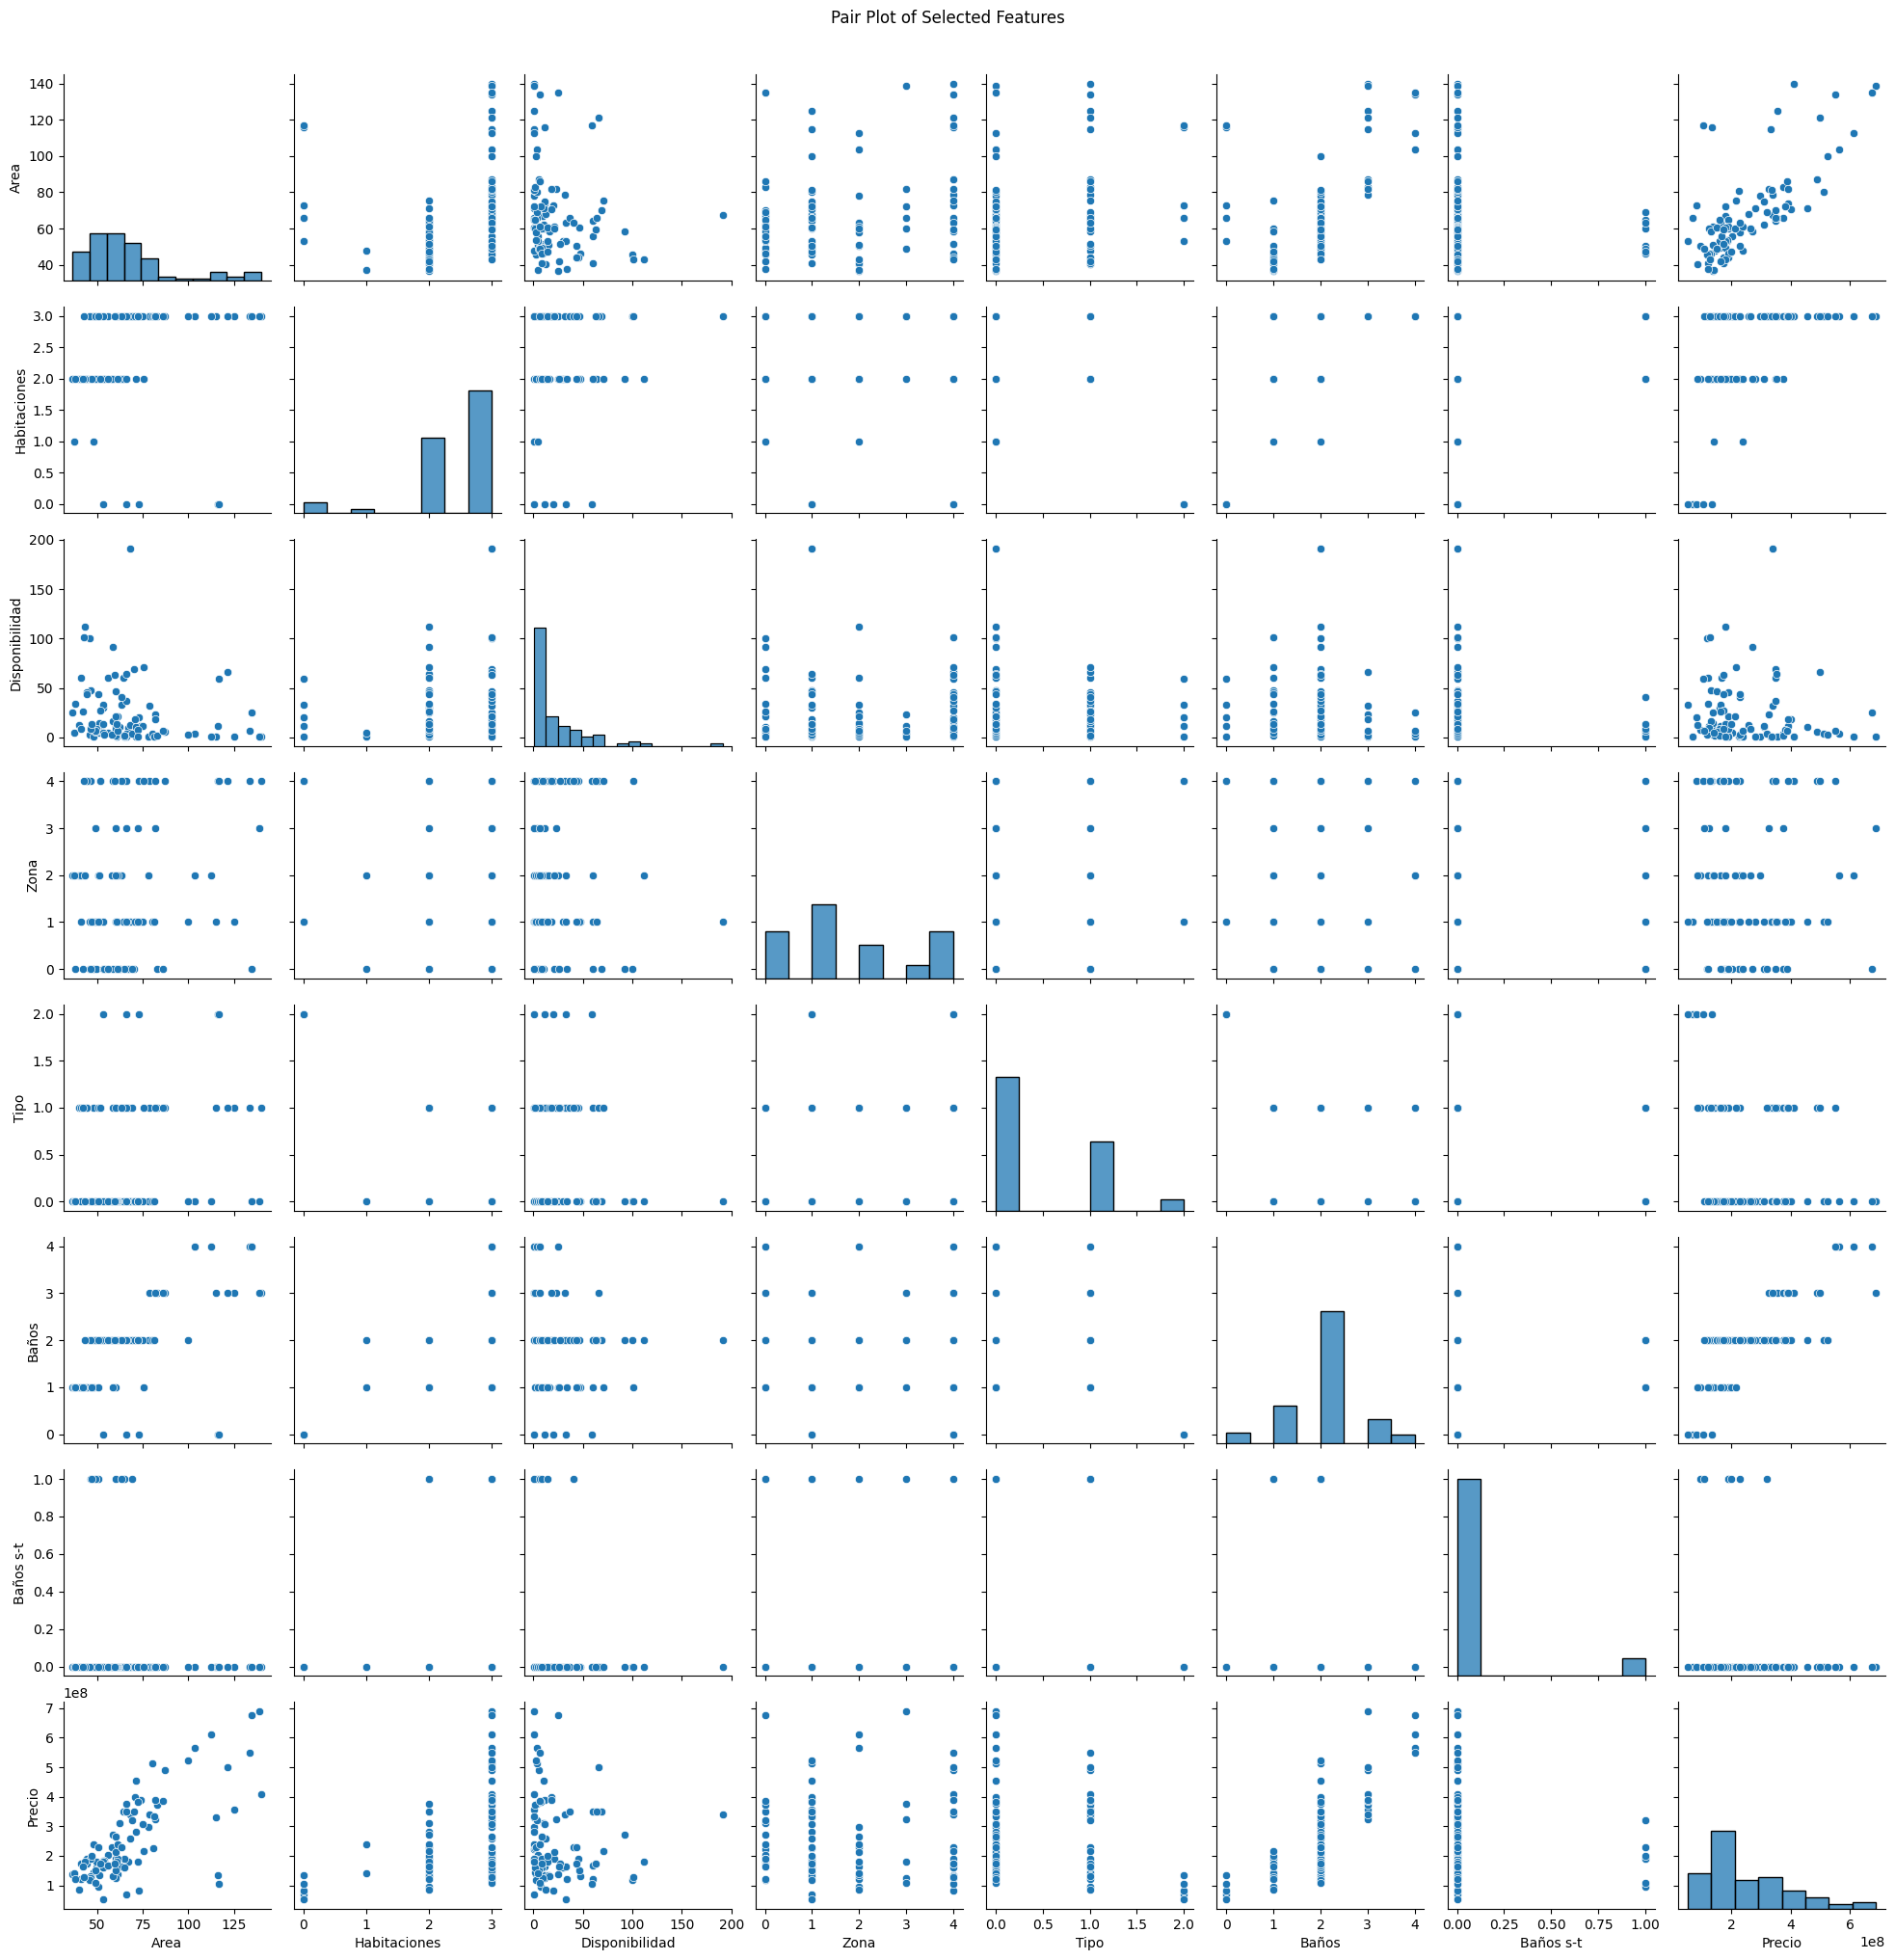

In [22]:
# Step 5: Multivariate Analysis after feature engenieering
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df_cleaned[['Area', 'Habitaciones', 'Disponibilidad', 'Zona', 'Tipo', 'Baños', 'Baños s-t', 'Precio']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

In [23]:
df_cleaned[['Area', 'Habitaciones', 'Disponibilidad', 'Zona', 'Tipo', 'Baños', 'Baños s-t', 'Precio']].corr()

,Area,Habitaciones,Disponibilidad,Zona,Tipo,Baños,Baños s-t,Precio
Area,1.000000,0.189441,-0.155577,0.218414,0.254924,0.533608,-0.138432,0.734465
Habitaciones,0.189441,1.000000,-0.056270,-0.073682,-0.417628,0.671112,0.068846,0.451457
Disponibilidad,-0.155577,-0.056270,1.000000,0.090646,-0.042941,-0.153466,-0.123878,-0.097172
Zona,0.218414,-0.073682,0.090646,1.000000,0.434797,-0.064514,-0.071914,0.008663
Tipo,0.254924,-0.417628,-0.042941,0.434797,1.000000,-0.316655,0.101034,-0.178361
Baños,0.533608,0.671112,-0.153466,-0.064514,-0.316655,1.000000,-0.061869,0.746102
Baños s-t,-0.138432,0.068846,-0.123878,-0.071914,0.101034,-0.061869,1.000000,-0.132706
Precio,0.734465,0.451457,-0.097172,0.008663,-0.178361,0.746102,-0.132706,1.000000


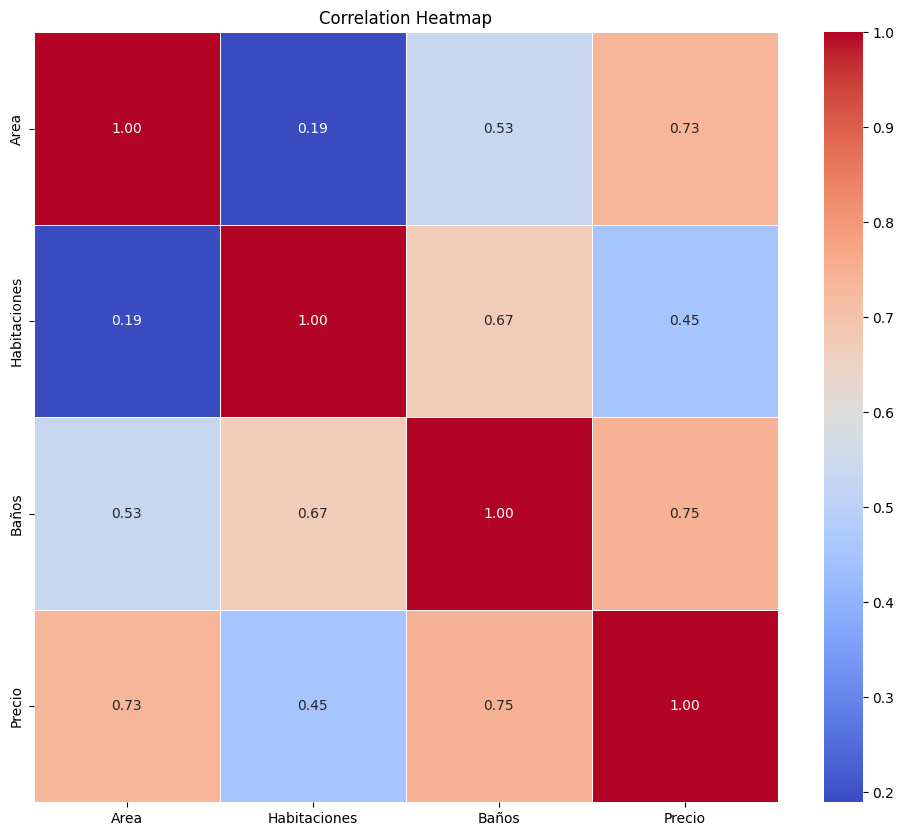

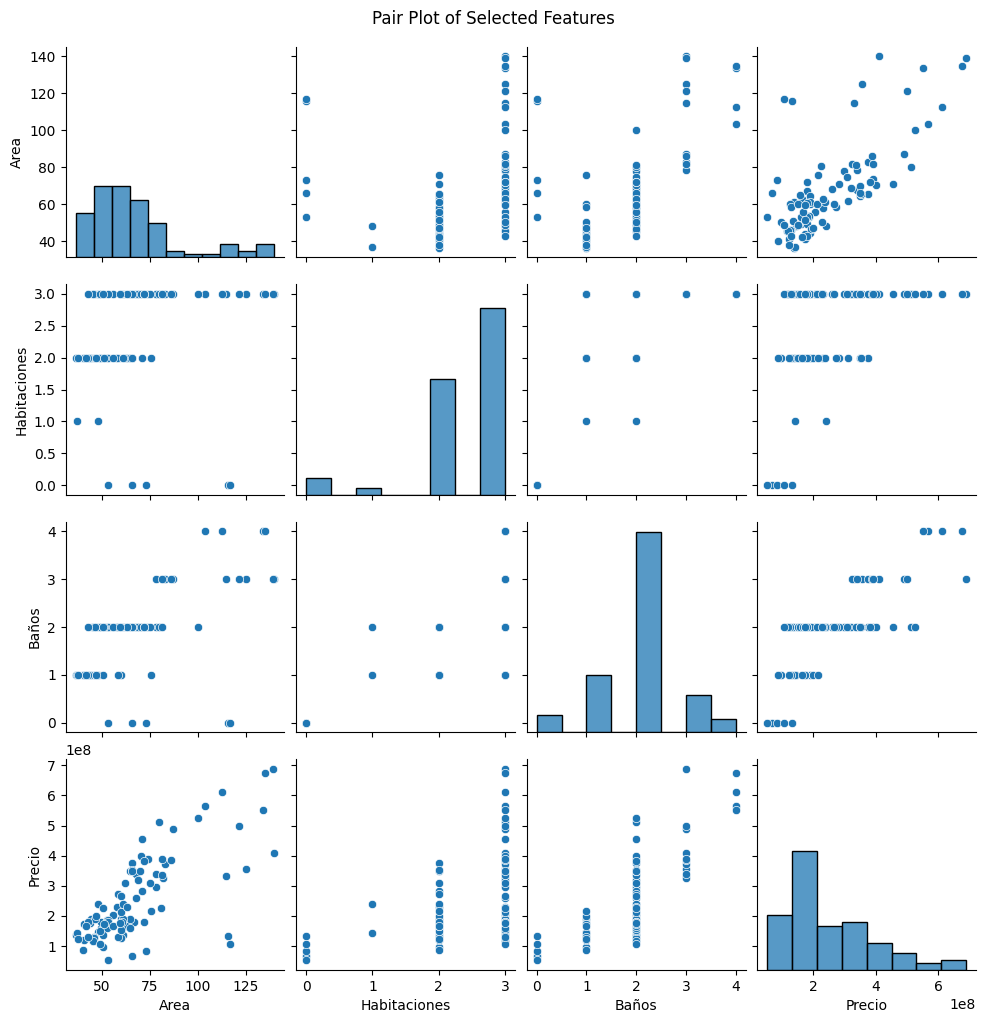

In [24]:
# Step 5: Multivariate Analysis after feature engenieering
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df_cleaned[['Area', 'Habitaciones', 'Baños', 'Precio']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

In [25]:
df_cleaned[['Area', 'Habitaciones', 'Baños', 'Precio']].corr()

,Area,Habitaciones,Baños,Precio
Area,1.000000,0.189441,0.533608,0.734465
Habitaciones,0.189441,1.000000,0.671112,0.451457
Baños,0.533608,0.671112,1.000000,0.746102
Precio,0.734465,0.451457,0.746102,1.000000


In [26]:
df_model = df_cleaned[['Area', 'Habitaciones', 'Baños', 'Precio']]
X = df_model.drop(columns=['Precio'])
y = df_model[['Precio']]

In [27]:
X.describe()

,Area,Habitaciones,Baños
count,96.000000,96.000000,96.000000
mean,67.281354,2.447917,1.916667
std,24.284379,0.779606,0.816497
min,36.400000,0.000000,0.000000
25%,50.562500,2.000000,2.000000
50%,61.000000,3.000000,2.000000
75%,74.167500,3.000000,2.000000
max,140.000000,3.000000,4.000000


In [28]:
y.describe()

,Precio
count,9.600000e+01
mean,2.514173e+08
std,1.388429e+08
min,5.299000e+07
25%,1.572500e+08
50%,1.905622e+08
75%,3.400000e+08
max,6.884000e+08


In [29]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

X = df_model.drop(columns=['Precio'])
y = df_model['Precio']
reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.35)

reg.fit(X, y)

y_pred = reg.predict(X)

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Absolute Error: 4441203.291666667
R-squared: 0.9861298203468323


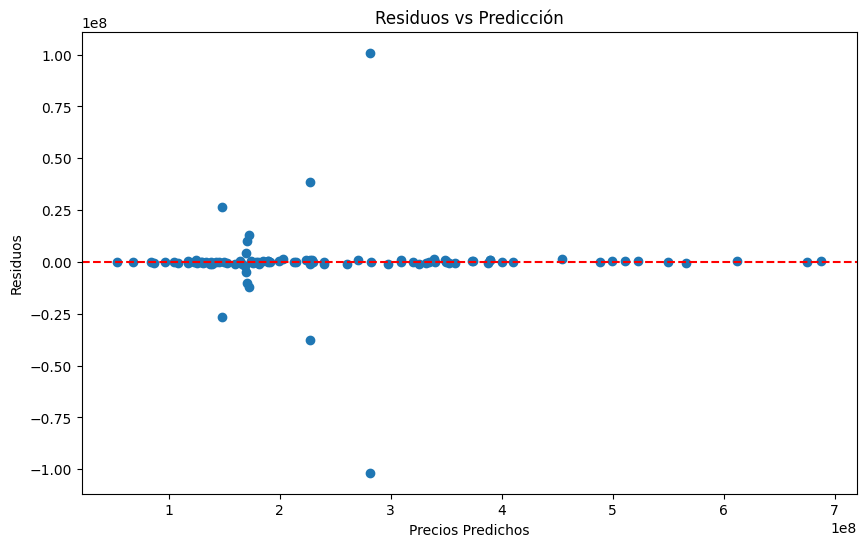

In [30]:
import matplotlib.pyplot as plt

# Calcular los residuos
residuals = y - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Predicción')
plt.xlabel('Precios Predichos')
plt.ylabel('Residuos')
plt.show()

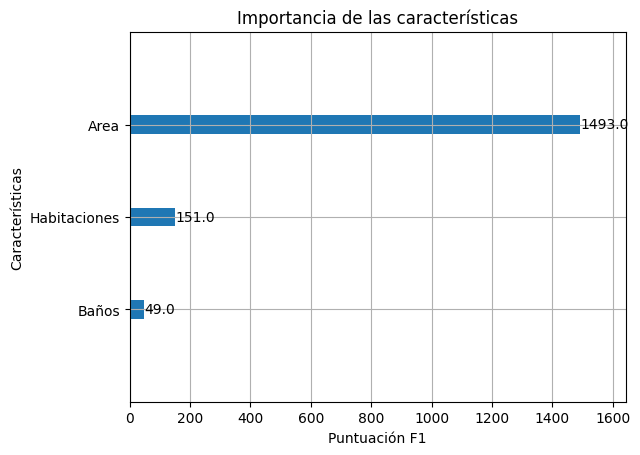

In [31]:
import matplotlib.pyplot as plt

# Visualizar la importancia de las características
xgb.plot_importance(reg)
plt.title('Importancia de las características')
plt.xlabel('Puntuación F1')
plt.ylabel('Características')
plt.show()

<Figure size 2000x1000 with 0 Axes>

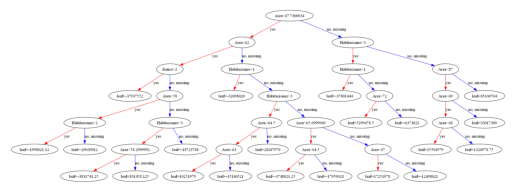

In [32]:
from xgboost import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(reg)
plt.savefig('tree.png', dpi=1000)
plt.show()

In [33]:
new_predict = reg.predict([[125.0,3,3]])
print(f"El precio predicho es: {new_predict[0]:.0f}")

El precio predicho es: 357437024


In [34]:
df_model.to_csv('df_model.csv', index=False)